# Introduction to Topic Modeling
---
---

## Learning goals
### Version A
* Implement a basic topic modeling algorithm and learn how to tweak it
* Learn how to use different methods to calculate topic prevalence
* Learn how to create some simple graphs with this output
* Think through how and why you might use topic modeling in a text analysis project

### Version B

* Understand the DTM and why it's important to text analysis
* Learn how to create a DTM in Python
* Learn basic functionality of Python's package scikit-learn
* Understand tf-idf scores
* Learn a simple way to identify distinctive words
* Implement a basic topic modeling algorithm and learn how to tweak it
* In the process, gain more familiarity and comfort with the Pandas package and manipulating data

### Version C

* Understood that Latent Dirichlet Allocation (LDA) is one type of topic modeling
* Loaded and saved the cleaned tokens into a Gensim corpus dictionary
* Created a bag-of-words (BoW) corpus
* Looked at Term Frequency–Inverse Document Frequency (TF-IDF)
* Trained a Latent Dirichlet Allocation (LDA) topic model
* Visualised the resulting topics with pyLDAvis


## Outline
- [What is topic modeling?](#whatis)
    - [How LDA works (briefly)](#mechanics)
- [How to join in with coding](#joinin)
- [The Pandas dataframe: Children's literature](#data)
    - [Exploratory data analysis](#explore)
- [Text preprocessing](#preprocess)
- [Train a topic model with LDA](#train)
- [Document-by-topic distribution](#topics)
- [Words aligned with each topic](#words)
- [Topic prevalence](#prevalence)
- [Topics over time](#time)
- [LDA as dimensionality reduction](#dimensions)
- [Visualising topics with pyLDAvis](#viz)
- [Evaluating the topic model](#eval)
- [Resources and alternatives](#resources)

## Key terms
* *Document Term Matrix*:
    * a matrix that describes the frequency of terms that occur in a collection of documents. In a document-term matrix, rows correspond to documents in the collection and columns correspond to terms.
* *TF-IDF Scores*: 
    * short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.
* *Topic Modeling*:
    * A statistical model to uncover abstract topics within a text. It uses the co-occurrence fo words within documents, compared to their distribution across documents, to uncover these abstract themes. The output is a list of weighted words, which indicate the subject of each topic, and a weight distribution across topics for each document.
    
* *LDA*:
    * Latent Dirichlet Allocation. A implementation of topic modeling that assumes a Dirichlet prior. It does not take document order into account, unlike other topic modeling algorithms.

## What is topic modeling? <a id='whatis'></a>

Topic modeling is a _distant reading_ technique for finding structure in large collections of text, without actually reading everything by eye. If you have hundreds or thousands of documents and want to understand roughly what your corpus contains, then topic modeling may be for you.

A topic modeling program finds the words that appear frequently together in a document and groups them together to form **topics**, which are mixtures of words that characterize the document's themes or underlying ideas. For example, one topic of this [Wikipedia article on black holes](https://en.wikipedia.org/wiki/Black_hole) is:

* black, hole, mass, star

![First picture of a supermassive black hole, captured in 2019](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cf/Black_hole_-_Messier_87.jpg/320px-Black_hole_-_Messier_87.jpg "First picture of a supermassive black hole, captured in 2019")

Not too surprising, but this topic does seem accurate on the face of it. What about a document that we are less familiar with? Here is a topic of a [speech made by John F. Kennedy at Rice University in 1962](https://er.jsc.nasa.gov/seh/ricetalk.htm):

* space, new, year, man

![Charles Conrad Jr., Apollo 12 Commander, examines the unmanned Surveyor III spacecraft on the Moon](https://upload.wikimedia.org/wikipedia/commons/thumb/4/4e/Surveyor_3-Apollo_12.jpg/274px-Surveyor_3-Apollo_12.jpg "Charles Conrad Jr., Apollo 12 Commander, examines the unmanned Surveyor III spacecraft on the Moon")

This is Kennedy's famous 'we choose to go to the moon' speech. Notice that 'moon' is not in this topic; but the speech does cover the history of humankind's ("man's") endeavours and emphasises a forward-looking perspective (the "new"-ness of advancements).

From these simplified examples, we can see that human intervention is still required to interpret what topics might 'mean'. Topic modeling is not magic; it is a tool that requires informed use and careful review, just like any other.

In the humanities, topic modeling may be used to support different approaches to large text corpora, such as:

* Survey a collection that is too big to read closely, e.g. [Computational Historiography: Data Mining in a Century of Classics Journals](http://www.perseus.tufts.edu/publications/02-jocch-mimno.pdf) (PDF)
* Look at thematic trends over time in an archive, e.g. [Topic Modeling Martha Ballard's Diary](http://www.cameronblevins.org/posts/topic-modeling-martha-ballards-diary/)
* Create metadata for an archive to improve accessibility, e.g. [Topic modeling for the valorisation of digitised archives of the European Commission](https://ieeexplore.ieee.org/abstract/document/7840981)
* Understand current trends in social media relevant to your discipline, e.g. [Mining the Open Web with ‘Looted Heritage’](https://electricarchaeology.ca/2012/06/08/mining-the-open-web-with-looted-heritage-draft/)

### How LDA works (briefly) <a id='mechanics'></a>

We'll implement the original and simplest topic modeling algorithm, Latent Dirichlet Allocation (or LDA), using Python's scikit-learn. There is a lot to learn about topic modeling, but the focus here is giving you starter code you can expand on later. To give a little more mathematical context, though, here are the mechanics of this version of topic modeling. 

LDA is a generative model&mdash;a model of the data-generating process&mdash;in which documents are mixtures of topics and topics are probability distributions over tokens in the vocabulary. The (normalized) frequency of word $j$ in document $i$ can be written as:

$q_{ij} = v_{i1}*\theta_{1j} + v_{i2}*\theta_{2j} + ... + v_{iK}*\theta_{Kj}$

where K is the total number of topics, $\theta_{kj}$ is the probability that word $j$ shows up in topic $k$ and $v_{ik}$ is the weight assigned to topic $k$ in document $i$. The model treats $v$ and $\theta$ as generated from Dirichlet-distributed priors and estimates them with Maximum Likelihood or Bayesian methods.

$^1$ Reference: Blei, D. M., A. Y. Ng, and M. I. Jordan (2003). Latent Dirichlet allocation. Journal of Machine
Learning Research 3, 993–1022.

---
---

## How to join in with coding <a id='joinin'></a>

* **Edit** any cell and try changing the code, or delete it and write your own.

* Before running a cell, think through the code and try to **guess** what output you'll get.

* If you encounter an **error**, take a breath; this is normal. Errors happen all the time, and by reading the error message you will often learn something new and useful.

* Remember: we are in the cloud, so you cannot break the notebook or your computer: **don't be afraid to experiment!**.

**Let's get coding!**

## The Pandas dataframe: Children's literature <a id='data'></a>

As our toy dataset, let's use a database of children's literature from the 19th century. The data were compiled by students in [this course](http://english197s2015.pbworks.com/w/page/93127947/FrontPage) and have been minimally cleaned for our use. The data and other corpora can be [found here](http://dhresourcesforprojectbuilding.pbworks.com/w/page/69244469/Data%20Collections%20and%20Datasets#demo-corpora), feel free to explore that data and play with it using text analysis!

First, we read our corpus into a Pandas dataframe. The file is stored as a compressed .csv file in the `day-1/` folder, so we tell Pandas the compression type (`.bz2`) so it can unpack and read it for us.

In [1]:
import pandas as pd
import numpy as np
df_lit = pd.read_csv("data/childrens_lit.csv.bz2", sep='\t', index_col=0, encoding = 'utf-8', compression='bz2')

#drop rows where the text is missing.
df_lit = df_lit.dropna(subset=['text'])

#view the dataframe
df_lit

,title,author gender,year,text
0,A Dog with a Bad Name,Male,1886,A DOG WITH A BAD NAME BY TALBOT BAINES REED ...
1,A Final Reckoning,Male,1887,A Final Reckoning: A Tale of Bush Life in Aust...
2,"A House Party, Don Gesualdo, and A Rainy June",Female,1887,A HOUSE-PARTY Don Gesualdo and A Rainy June...
3,A Houseful of Girls,Female,1889,"A HOUSEFUL OF GIRLS. BY SARAH TYTLER, AUTHOR ..."
4,A Little Country Girl,Female,1885,"LITTLE COUNTRY GIRL. BY SUSAN COOLIDGE, ..."
...,...,...,...,...
127,Up the River,Male,1881,UP THE RIVER OR YACHTING ON THE MISSISSIPPI ...
128,What Katy Did Next,Female,1886,WHAT KATY DID NEXT BY SUSAN COOLIDGE This...
129,Winning His Spurs,Male,1882,WINNING HIS SPURS ...
130,With Clive in India,Male,1884,"WITH CLIVE IN INDIA: Or, The Beginnings of an..."


### Explore the data <a id='explore'></a>

Let's look at some descriptive statistics about this dataset, to get a feel for what's in it and check for any visible errors. This will help with interpreting the data and knowing what kinds of questions to ask. 

The first thing most people do is to `describe` their data. (This is the `summary` command in R, or the `sum` command in Stata).

In [2]:
#There's only one numeric column in our data ('year'), so we only get one column for output.
df_lit.describe()

,year
count,127.000000
mean,1885.110236
std,2.752281
min,1880.000000
25%,1883.000000
50%,1886.000000
75%,1887.000000
max,1889.000000


<AxesSubplot:>

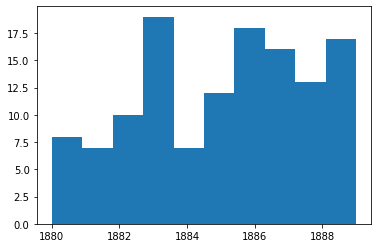

In [3]:
#Visualize the distribution of the 'year' column
import matplotlib
df_lit['year'].hist(bins = 10, grid=False)

What's the breakdown of author genders in this dataset?

In [4]:
#We can count this using the value_counts() function
df_lit['author gender'].value_counts()

Male      99
Female    28
Name: author gender, dtype: int64

In [5]:
#This only gets us numerical summaries. To get summaries of some of the other columns, we can explicitly ask for it.
df_lit.describe(include=['O'])

,title,author gender,text
count,127,127,127
unique,127,2,127
top,A Dog with a Bad Name,Male,A DOG WITH A BAD NAME BY TALBOT BAINES REED ...
freq,1,99,1


What kind of titles do these books have?

In [6]:
df_lit['title'].value_counts().head(10)

A Dog with a Bad Name                            1
The Cornet of Horse                              1
The Lion of Saint Mark                           1
The Life of a Ship                               1
The Land of Mystery                              1
The Island Queen                                 1
The Happy Prince and Other Stories               1
The Gold of Fairnilee                            1
The Giant of the North Pokings Round the Pole    1
The Fugitives the Tyrant Queen of Madagascar     1
Name: title, dtype: int64

What is the average year for each author gender? To answer this question, we use the powerful `groupby` function in Pandas. (Similar to `collapse` on Stata)

In [7]:
books_grouped_by_gender = df_lit.groupby("author gender")
books_grouped_by_gender['year'].mean().sort_values(ascending=False)

author gender
Female    1885.250000
Male      1885.070707
Name: year, dtype: float64

## Text preprocessing <a id='preprocess'></a>

>**The key to understanding Natural Language Processing (NLP) is that the computer can only do computations on _numbers_. We have to present our corpus for analysis in a numerical form&mdash;typically _vectors_&mdash;and make human sense of everything at the end.**

A "bag of words" corpus is the _vocabulary_ of tokens (words) in the corpus together with some _measure_ of how often they occur. The measurement may be:
* binary (presence or absence)
* count (how many times the token occurs)
* frequency (count divided by the total number of tokens).

This is called a "bag of words" because the order and location of words is discarded. For example, it doesn't matter if the words 'red' and 'nose' are adjacent ('red nose'), or at the beginning or end of a sentence; this approach just treats the words individually. It's like a 'bag' of Scrabble™ tiles, where each tile is a word, all rattling around together in no particular order.

To turn our texts into numbers, let's use the `CountVectorizer` function from `scikit-learn`. This transforms the text into a Document-Term Matrix (DTM), where each text is a row and each word is a column. In other words, each document becomes a _vector_ of word frequencies with a value for the count of each word in that document. This is also called Term Frequency (TF) weighting, representing each text by its word counts&mdash;probably the most straightforward method of preparing text data.

In [69]:
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize our text using CountVectorizer
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.80, min_df=50,
                                max_features=None,
                                stop_words='english'
                                )

dtm = tf_vectorizer.fit_transform(df_lit.text)
print("Done!")

Extracting tf features for LDA...
Done!


Let's take a look at the DTM we just made.

In [56]:
dtm

<127x3197 sparse matrix of type '<class 'numpy.int64'>'
	with 229602 stored elements in Compressed Sparse Row format>

This format is called Compressed Sparse Format. It saves a lot of memory to store the DTM in this format, but it is difficult to look at for a human. For illustration purposes, let's convert this matrix back to a Pandas DataFrame, a more understandable format. For larger datasets, you will have to use the Compressed Sparse Format. 

In [11]:
long_dtm = pd.DataFrame(dtm.toarray(), 
                        columns=tf_vectorizer.get_feature_names_out(), 
                        index=df_lit.index)
long_dtm.head()

/home/jhaber/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,000,10,20,30,50,_you_,abandoned,ability,abode,abreast,...,yelling,yellow,yells,yer,yield,yielded,yonder,york,youngest,youth
0,0,1,0,1,0,7,0,0,1,0,...,1,1,2,0,0,5,1,23,1,14
1,0,2,4,1,1,0,2,1,2,2,...,1,0,2,2,0,0,0,0,0,2
2,0,1,0,0,0,2,0,1,1,0,...,0,6,0,0,0,2,3,0,1,13
3,0,0,1,0,0,3,3,6,0,0,...,1,2,0,0,1,4,0,0,7,13
4,0,0,0,0,0,0,0,0,0,1,...,0,16,0,0,1,0,1,4,3,1


We can use a long-format DTM to quickly identify the most frequent words in a dataset.

In [12]:
long_dtm.sum().sort_values(ascending=False).head(10)

doctor     5032
dick       4857
king       4490
jack       3787
uncle      3680
tom        3199
ship       2762
project    2738
army       2735
french     2677
dtype: int64

What are the most frequent words for male and female authors?

#### TO DO: Add solution

### Challenge

* Print out the most infrequent words rather than the most frequent words. You can look at the [Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-stats) for more information.
* Print the average number of times each word is used in a review.
* Print this out sorted from highest to lowest.

In [13]:
# your code here

In [14]:
# solution

### TO DO: Add solution

## Train a topic model using LDA <a id='train'></a>

The first thing we need to do is 'train a model'. These words and concepts come from the (fashionable!) sphere of **machine learning**. A 'model' is a simplified representation of something in the real world that a computer can handle. In topic modeling, the model is a representation of the topics of the corpus.

We can say the computer acquires 'experience', or a simplified 'understanding' of what the corpus is about by creating a model of it. We have to train the computer in how to make its model by feeding it training data&mdash;in the case of topic modeling, this data is the text we are interested in.

Let's train the model using the `scikit-learn` function `LatentDirichletAllocation`. See [here](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html) for more information about this function. 

In [15]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

n_samples = 2000
n_topics = 4
n_top_words = 50

##This is a function to print out the top words for each topic in a pretty way.
#Don't worry too much about understanding every line of this code.
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [16]:
print("Fitting LDA model with tf features, "
      "n_samples=%d and n_topics=%d..."
      % (n_samples, n_topics))

#define the lda function, with desired options
#Check the documentation, linked above, to look through the options
lda = LDA(n_components=n_topics, 
          max_iter=20,
          learning_method='online',
          learning_offset=80.,
          total_samples=n_samples,
          random_state=0)
#fit the model
lda.fit(dtm)
print("Done!")

Fitting LDA model with tf features, n_samples=2000 and n_topics=4...
Done!


In [17]:
#print the top words per topic, using the function defined above.
#Unlike R, which has a built-in function to print top words, we have to write our own for scikit-learn

print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names_out()
print_top_words(lda, tf_feature_names, n_top_words)


Topics in LDA model:

Topic #0:
project doctor girls sister papa mamma london baby sweet tom street works dr remarked aunt tea youth foundation presently study em ain cousin office darling loved ladies wasn everybody public flower observed nurse ma shop snow ye queen class reader ice stairs flowers lovely agreement sisters doesn carriage bell garden

Topic #1:
dick uncle doctor er jack ain tom den yer fish em rock wolf gun rope lads ha birds rocks beneath ay stream shock tail moments mate excitedly garden eh sand fishing thrust ye nay gazing softly mountain ship tremendous hook bird leg ashore growled penny shore stones farther jump knife

Topic #2:
king army french troops camp attack officers prince ship john soldiers city village officer guns rode shore regiment march tom fort wounded british boats sword advanced castle jack james indian band marched native prisoners ships arrows france numbers lads forest frank ride presently vessel fought mounted fleet column stream rear

Topic #3

/home/jhaber/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Take a minute to inspect these top words. _What name would you give each of these topics?_ (This is a common task in topic modeling.)

> **❗Important Note: Topic models are not perfectly reproducible, so you may see different topics, words, and/or probabilities  from what others see. This means my examples may not match up exactly with what you see when you run the notebook.**

### Challenge

Copy and paste the above code and fit a new model, `lda_new`, by changing some of the parameters. How does this change the output?

Suggestions:
1. Change the number of topics. 
2. Do not remove stop words. 
3. Change other options, either in the vectorize stage or the LDA model.

In [18]:
#your code here

In [19]:
#solution


## Document by Topic Distribution <a id='topics'></a>

One thing we may want to do with the output is find the most representative texts for each topic. A simple way to do this (but not memory efficient) is to merge the topic distribution back into the Pandas dataframe.

First get the topic distribution array.

In [20]:
topic_dist = lda.transform(dtm)
topic_dist

array([[9.27993669e-01, 1.43700382e-02, 5.76027691e-02, 3.35234006e-05],
       [2.73383488e-02, 7.01313231e-02, 4.91328141e-01, 4.11202187e-01],
       [9.72301526e-01, 3.66126075e-05, 2.25981325e-02, 5.06372922e-03],
       [9.99907351e-01, 3.06661128e-05, 3.10550012e-05, 3.09277922e-05],
       [9.69292227e-01, 2.88828433e-02, 6.05477628e-05, 1.76438162e-03],
       [9.02818435e-01, 9.70583246e-02, 6.16743414e-05, 6.15656757e-05],
       [4.10396600e-01, 5.86307314e-01, 1.35979768e-04, 3.16010688e-03],
       [9.99890902e-01, 3.60980543e-05, 3.67128035e-05, 3.62872482e-05],
       [2.46371338e-01, 2.56589766e-01, 4.50088248e-01, 4.69506480e-02],
       [7.08481800e-05, 3.81086663e-01, 6.18771825e-01, 7.06641686e-05],
       [6.19417246e-02, 5.60865999e-02, 8.81890242e-01, 8.14334923e-05],
       [5.50253267e-05, 5.59319821e-05, 5.52375701e-05, 9.99833805e-01],
       [1.54941895e-01, 8.53067338e-05, 1.95440934e-01, 6.49531864e-01],
       [8.16413872e-01, 6.08089939e-02, 1.22708631e

Merge back in with the original dataframe:

In [21]:
topic_dist_df = pd.DataFrame(topic_dist)
df_w_topics = topic_dist_df.join(df_lit)
df_w_topics

,0,1,2,3,title,author gender,year,text
0,0.927994,0.014370,0.057603,0.000034,A Dog with a Bad Name,Male,1886.0,A DOG WITH A BAD NAME BY TALBOT BAINES REED ...
1,0.027338,0.070131,0.491328,0.411202,A Final Reckoning,Male,1887.0,A Final Reckoning: A Tale of Bush Life in Aust...
2,0.972302,0.000037,0.022598,0.005064,"A House Party, Don Gesualdo, and A Rainy June",Female,1887.0,A HOUSE-PARTY Don Gesualdo and A Rainy June...
3,0.999907,0.000031,0.000031,0.000031,A Houseful of Girls,Female,1889.0,"A HOUSEFUL OF GIRLS. BY SARAH TYTLER, AUTHOR ..."
4,0.969292,0.028883,0.000061,0.001764,A Little Country Girl,Female,1885.0,"LITTLE COUNTRY GIRL. BY SUSAN COOLIDGE, ..."
...,...,...,...,...,...,...,...,...
122,0.000047,0.000047,0.000048,0.999858,Treasure Island,Male,1883.0,TREASURE ISLAND by Robert Louis Stevenson ...
123,0.960205,0.000054,0.005191,0.034551,Twice Bought,Male,1885.0,"The Project Gutenberg EBook of Twice Bought, b..."
124,0.000026,0.000025,0.999923,0.000026,Two Arrows,Male,1886.0,TWO ARROWS HARPER'S YOUNG PEOPLE'S SERIES...
125,0.000020,0.000020,0.999940,0.000020,Uncle Remus: His Songs and Sayings,Male,1880.0,Uncle Remus: His Songs and His Sayings By Joe...


Now we can sort the dataframe for the topic of interest, and view the top documents for the topics.
Below we sort the documents first by Topic 0 (looking at the top words for this topic I think it's about family, health, and domestic activities), and next by Topic 1 (again looking at the top words I think this topic is about children playing outside in nature). These topics may be a family/nature split?

Look at the titles for the two different topics. Look at the gender of the author. Hypotheses?

In [22]:
print(df_w_topics[['title', 'author gender', 0]].sort_values(by=[0], ascending=False))

                                  title author gender         0
85                                  NaN           NaN  0.999914
3                   A Houseful of Girls        Female  0.999907
97                   The Life of a Ship          Male  0.999903
100   The Little Princess of Tower Hill        Female  0.999898
7                      A World of Girls        Female  0.999891
..                                  ...           ...       ...
24                     Dick o' the Fens          Male  0.000022
111                The Thorogood Family          Male  0.000021
33                       For the Temple          Male  0.000021
125  Uncle Remus: His Songs and Sayings          Male  0.000020
49                            Menhardoc          Male  0.000019

[127 rows x 3 columns]


In [23]:
print(df_w_topics[['title', 'author gender', 1]].sort_values(by=[1], ascending=False))

                                  title author gender         1
24                     Dick o' the Fens          Male  0.999933
53                      My Friend Smith          Male  0.999922
19                          Bunyip Land          Male  0.999919
48               Little Lord Fauntleroy        Female  0.999916
114             The Willoughby Captains          Male  0.999896
..                                  ...           ...       ...
126                  Under Drake's Flag          Male  0.000022
111                The Thorogood Family          Male  0.000021
33                       For the Temple          Male  0.000021
76                        The Big Otter          Male  0.000021
125  Uncle Remus: His Songs and Sayings          Male  0.000020

[127 rows x 3 columns]


### Challenge

- What is the average topic weight by author gender, for each topic?
- Which topic is most represented in texts by women? Most represented in texts by men?
- Which topic is least represented in texts by women? Least represented in texts by men?
- Graph these results.

Hint 1: Consider using the python `range` function and a for-loop to create a list of topic indices and inspect average topic weights. This code block gets that started for you.

In [24]:
topic_columns = range(0,4)
for num in topic_columns:
    print(num)

0
1
2
3


Hint 2: Use a Pandas `groupby()` to compare the topic loadings of Male and Female authors.

In [25]:
#your code here

In [26]:
#solution
grouped = df_w_topics.groupby("author gender")
for num in topic_columns:
    print(num)
    print(grouped[num].mean())

0
author gender
Female    0.653199
Male      0.323377
Name: 0, dtype: float64
1
author gender
Female    0.127721
Male      0.189827
Name: 1, dtype: float64
2
author gender
Female    0.157666
Male      0.326972
Name: 2, dtype: float64
3
author gender
Female    0.061414
Male      0.159824
Name: 3, dtype: float64


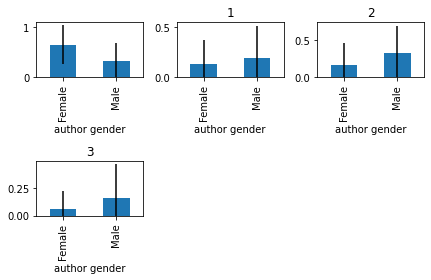

In [27]:
import matplotlib.pyplot as plt
fig1 = plt.figure()
chrt = 0
for num in topic_columns:
    chrt += 1 
    ax = fig1.add_subplot(2,3, chrt)
    grouped[num].mean().plot(
        kind = 'bar', 
        yerr = grouped[num].std(), 
        ylim=0, ax=ax, title=num)

fig1.tight_layout()
plt.show()

## Words aligned with each topic <a id='words'></a>

Let's calculate the total number of words aligned with each topic and compare by author gender.

In [28]:
#first create word count column

df_w_topics['word_count'] = df_w_topics['text'].apply(lambda x: len(str(x).split()))
df_w_topics['word_count']

0       96493
1      100603
2       85132
3       92822
4       48251
        ...  
122     68589
123     76593
124     56018
125     53942
126    108275
Name: word_count, Length: 127, dtype: int64

In [29]:
#multiply topic weight by word count

df_w_topics['0_wc'] = df_w_topics[0] * df_w_topics['word_count']
df_w_topics['0_wc']

0      89544.893129
1       2750.319905
2      82773.973483
3      92813.400143
4      46769.319262
           ...     
122        3.232002
123    73544.948175
124        1.447412
125        1.081305
126        2.422885
Name: 0_wc, Length: 127, dtype: float64

In [30]:
#create a for loop to do this for every topic

col_list = []
for num in topic_columns:
    col = "%d_wc" % num
    col_list.append(col)
    df_w_topics[col] = df_w_topics[num] * df_w_topics['word_count']
    
df_w_topics

,0,1,2,3,title,author gender,year,text,word_count,0_wc,1_wc,2_wc,3_wc
0,0.927994,0.014370,0.057603,0.000034,A Dog with a Bad Name,Male,1886.0,A DOG WITH A BAD NAME BY TALBOT BAINES REED ...,96493,89544.893129,1386.608095,5558.264002,3.234773
1,0.027338,0.070131,0.491328,0.411202,A Final Reckoning,Male,1887.0,A Final Reckoning: A Tale of Bush Life in Aust...,100603,2750.319905,7055.421499,49429.084933,41368.173663
2,0.972302,0.000037,0.022598,0.005064,"A House Party, Don Gesualdo, and A Rainy June",Female,1887.0,A HOUSE-PARTY Don Gesualdo and A Rainy June...,85132,82773.973483,3.116905,1923.824216,431.085396
3,0.999907,0.000031,0.000031,0.000031,A Houseful of Girls,Female,1889.0,"A HOUSEFUL OF GIRLS. BY SARAH TYTLER, AUTHOR ...",92822,92813.400143,2.846490,2.882587,2.870780
4,0.969292,0.028883,0.000061,0.001764,A Little Country Girl,Female,1885.0,"LITTLE COUNTRY GIRL. BY SUSAN COOLIDGE, ...",48251,46769.319262,1393.626070,2.921490,85.133178
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,0.000047,0.000047,0.000048,0.999858,Treasure Island,Male,1883.0,TREASURE ISLAND by Robert Louis Stevenson ...,68589,3.232002,3.214454,3.282020,68579.271523
123,0.960205,0.000054,0.005191,0.034551,Twice Bought,Male,1885.0,"The Project Gutenberg EBook of Twice Bought, b...",76593,73544.948175,4.102616,397.586668,2646.362541
124,0.000026,0.000025,0.999923,0.000026,Two Arrows,Male,1886.0,TWO ARROWS HARPER'S YOUNG PEOPLE'S SERIES...,56018,1.447412,1.423235,56013.692946,1.436407
125,0.000020,0.000020,0.999940,0.000020,Uncle Remus: His Songs and Sayings,Male,1880.0,Uncle Remus: His Songs and His Sayings By Joe...,53942,1.081305,1.091519,53938.737610,1.089566


### Challenge

- What is the total number of words aligned with each topic, by author gender?
- What is the proportion of total words aligned with each topic, by author gender?

In [31]:
#your code here

In [32]:
#solution
grouped = df_w_topics.groupby('author gender')
for e in col_list:
    print(e)
    print(grouped[e].sum())

0_wc
author gender
Female    1.150752e+06
Male      2.460418e+06
Name: 0_wc, dtype: float64
1_wc
author gender
Female    1.484812e+05
Male      1.719037e+06
Name: 1_wc, dtype: float64
2_wc
author gender
Female    1.392767e+05
Male      2.593460e+06
Name: 2_wc, dtype: float64
3_wc
author gender
Female    6.686701e+04
Male      1.124740e+06
Name: 3_wc, dtype: float64


In [33]:
for e in col_list:
    print(e)
    print(grouped[e].sum()/grouped['word_count'].sum())

0_wc
author gender
Female    0.764428
Male      0.311538
dtype: float64
1_wc
author gender
Female    0.098634
Male      0.217664
dtype: float64
2_wc
author gender
Female    0.092519
Male      0.328384
dtype: float64
3_wc
author gender
Female    0.044419
Male      0.142414
dtype: float64


In [34]:
for e in col_list:
    print(grouped[e].sum()/grouped['word_count'].sum())

author gender
Female    0.764428
Male      0.311538
dtype: float64
author gender
Female    0.098634
Male      0.217664
dtype: float64
author gender
Female    0.092519
Male      0.328384
dtype: float64
author gender
Female    0.044419
Male      0.142414
dtype: float64


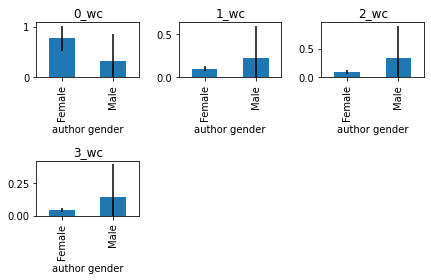

In [35]:
fig2 = plt.figure()
chrt = 0
for e in col_list:
    chrt += 1 
    ax2 = fig2.add_subplot(2,3, chrt)
    (grouped[e].sum()/grouped['word_count'].sum()).plot(
        kind = 'bar', 
        yerr = grouped[e].sum()/grouped['word_count'].sum().std(), 
        ylim=0, ax=ax2, title=e)

fig2.tight_layout()
plt.show()

Question: Why might we want to do one calculation over the other? Take average topic weight per documents versus the average number of words aligned with each topic?

This brings us to...

## Topic Prevalence <a id='prevalence'></a>

How do we define prevalence? What are different ways of measuring this, and the benefits/drawbacks of each?

#### TO DO: Provide some answers here.

### Challenge

- Find the most prevalent topic in the corpus.
- Find the least prevalent topic in the corpus.        

In [36]:
#your code here

In [37]:
#solution
for e in col_list:
    print(e)
    print(df_w_topics[e].sum()/df_w_topics['word_count'].sum())

0_wc
0.3840432895308944
1_wc
0.19860793419265882
2_wc
0.29062288331375674
3_wc
0.12672589296269


## Prevalence over time <a id='overtime'></a>

We can do the same as above, but by year, to graph the prevalence of each topic over time.

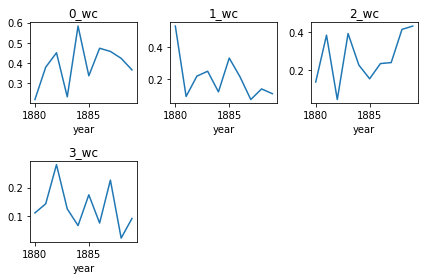

In [38]:
grouped_year = df_w_topics.groupby('year')
fig3 = plt.figure()
chrt = 0
for e in col_list:
    chrt += 1 
    ax2 = fig3.add_subplot(2,3, chrt)
    (grouped_year[e].sum()/grouped_year['word_count'].sum()).plot(
        kind='line', title=e)
    
fig3.tight_layout()
plt.show()

Topic 2 I interpret to be about battles in France. What is going on between 1800 and 1804 in France that might make this topic increasingly popular over this time period?

## LDA as dimensionality reduction <a id='dimensionality'></a>

Another use for topic modeling is to reduce the dimensionality of text. Instead of representing a document as a vector of token counts over the whole vocabulary (which may be very large), topic modeling can represent that document as a weighted average of _k_ topics over a finite number of (more or less) interpretable topics. The latter approach is usually more tractable for subsequent statistical analysis (linear regression, decision trees, transformers, etc). 

Now that we obtained a distribution of topic weights for each document, we can represent our corpus with a dense document-weight matrix as opposed to our initial sparse DTM. The weights can then replace tokens as features for any subsequent task (classification, prediction, etc). A simple example may consist in measuring cosine similarity between documents. For instance, which book is closest to the first book in our corpus? Let's use pairwise cosine similarity to find out. 

NB: cosine similarity measures an angle between two vectors, which provides a measure of distance robust to vectors of different lenghts (total number of tokens)

First, let's turn the DTM into a long-format, readable dataframe (remember: this is memory-inefficient).

In [75]:
dtm = tf_vectorizer.fit_transform(df_lit['text'])

Next let's import the cosine_similarity function from sklearn and print the cosine similarity between the first and second book or the first and third book.

In [76]:
from sklearn.metrics.pairwise import cosine_similarity
print("Cosine similarity between first and second book: ", 
      str(cosine_similarity(dtm[0,:], dtm[1,:])))
print("Cosine similarity between first and third book: ", 
      str(cosine_similarity(dtm[0,:], dtm[2,:])))

Cosine similarity between first and second book:  [[0.28012828]]
Cosine similarity between first and third book:  [[0.40808192]]


What if we use the topic weights instead of word frequencies?

In [65]:
dwm = df_w_topics.iloc[:,:10]

print("Cosine similarity between first and second book: " + str(cosine_similarity(dwm.iloc[0,:], dwm.iloc[1,:])))
print("Cosine similarity between first and third book: " + str(cosine_similarity(dwm.iloc[0,:], dwm.iloc[2,:])))

ValueError: could not convert string to float: 'A Dog with a Bad Name'

#### TO DO: Fix this code

### Challenge

Calculate the cosine similarity between the first book and all other books to identify the most similar one. 

In [ ]:
# your code here

#### TO DO: Add solution

## Visualising topics with pyLDAvis <a id='viz'></a>

Understanding the data that underlies a topic model is vital, but fortunately we also have a slightly more human-friendly option to help us interpret the topics!

[pyLDAvis](https://github.com/bmabey/pyLDAvis) is a library for creating interactive topic model visualisations. It even has a helper function specifically for scikit-learn that we can use.

> **It will take a while to load this visualisation!**

In [83]:
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()

# Silence an annoying warning we cannot do anything about
import warnings
warnings.filterwarnings('ignore')

In [84]:
pyLDAvis.sklearn.prepare(lda, dtm, tf_vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.067144 -0.057703       1        1  35.723702
0      0.012048  0.063136       2        1  35.454139
1     -0.099979 -0.026718       3        1  17.201155
3      0.020787  0.021285       4        1  11.621004, topic_info=         Term         Freq        Total Category  logprob  loglift
815      dick  4914.000000  4914.000000  Default  30.0000  30.0000
1564     jack  3862.000000  3862.000000  Default  29.0000  29.0000
2989    uncle  3740.000000  3740.000000  Default  28.0000  28.0000
989        er  2337.000000  2337.000000  Default  27.0000  27.0000
870    doctor  5069.000000  5069.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
1572     john   290.175681  2306.869082   Topic4  -5.9127   0.0792
2747   street   237.391109  1323.321827   Topic4  -6.1135   0.4342
1915  officer   257.116585  1703.200395   Topic4  -6.0337   0.2616
870    doctor   339.829496  5069.883998   Topic4  -5.7548  -0.5503
1255    girls   245.323294  2264.521683   Topic4  -6.0807  -0.0702

[258 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
5         1  0.049988     _you_
5         2  0.864494     _you_
5         3  0.020583     _you_
5         4  0.064690     _you_
56        1  0.763321  advanced
...     ...       ...       ...
3193      4  0.030138    yonder
3196      1  0.234008     youth
3196      2  0.655812     youth
3196      3  0.040312     youth
3196      4  0.069809     youth

[824 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2, 4])

Here are some hints to help you interpret the visualisation:

* On the **left-hand side** is a scatterplot of some bubbles:
 * Each **bubble** represents a topic.
 * The **size of a bubble** represents how _prevalent_ or popular the topic is overall.
 * The **distance** from one bubble to another represents how similar the topics are to each other. If they overlap then the topics share significant similarity.
 
* On the **right-hand side** is a histogram of terms (tokens):
 * Select a bubble and it shows the top-30 **most relevant terms** for that topic.
 * The **red bar** represents how frequent a term is in the topic.
 * The **blue bar** represents how frequent the term is overall in all topics. So a long red bar with only a short blue bar indicates a term that is highly specific to that particular topic. Conversely, a red bar with a long blue bar means the term is also present in many other topics.
 * By mousing over a particular term, the size of the bubbles changes to show the relative frequency of that term in the various topics.
 * By adjusting the slide, it adjusts the **_relevance_ value (λ)**, which is the weight given to whether a term appears exclusively in a particular topic or is spread over topics more evenly. If λ = 1 terms are ranked according to their probabilities in the particular topic only; if λ = 0 terms are ranked higher if they are unusual terms that occur almost exclusively in that topic. Typically, the optimal value is around 0.6, but it is interesting to adjust it and observe any differences.

## Evaluating the topic model <a id='eval'></a>

#### TO DO: Add code here

Use tmtoolkit: https://tmtoolkit.readthedocs.io/en/latest/topic_modeling.html

Consider grid search too: https://www.machinelearningplus.com/nlp/topic-modeling-python-sklearn-examples/

---
---

## Resources and alternatives <a id='resources'></a>

In addition to LDA in `scikit-learn`, there are a few other common tools for topic modeling in Python:
- [Here's a detailed example of using LDA in scikit-learn](https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py), including several alternatives (like NMF) we won't explore.
- The other major topic modeling package is [Gensim](https://radimrehurek.com/gensim/) (example implementation [here](https://github.com/bhargavvader/personal/blob/master/notebooks/text_analysis_tutorial/topic_modelling.ipynb) and [here](https://github.com/susanli2016/NLP-with-Python/blob/master/LDA_news_headlines.ipynb)). 
- Another option is [textacy](https://textacy.readthedocs.io/en/latest/), which is built on the powerful spaCy library for text manipulation ([example implementation](https://github.com/repmax/topic-model/blob/master/topic-modelling.ipynb)).

Another well-known tool for topic modeling is called [MALLET](http://mallet.cs.umass.edu/topics.php), which is a program (written in Java) that you download to your computer. You have to type commands to use MALLET, but it has otherwise done a great deal for you. 
- [Getting Started with Topic Modeling and MALLET](https://programminghistorian.org/en/lessons/topic-modeling-and-mallet) from Programming Historian gives a step-by-step tutorial on MALLET.
- There is a graphical interface for MALLET called [Topic Modeling Tool](https://github.com/senderle/topic-modeling-tool) that is a bit easier to use. The [Quickstart Guide](https://senderle.github.io/topic-modeling-tool/documentation/2017/01/06/quickstart.html) will get you up and running.

If you are looking to use R rather than Python, then `tidytext` is a popular NLP library that will help you work with the `topicmodels` package. 
- The book _Text Mining with R_ devotes [chapter 6](https://www.tidytextmining.com/topicmodeling.html) to tidytext.

Finally, if coding isn't your thing, you can explore the topics of a few documents in a casual way with the online digital text environment [Voyant Tools](https://voyant-tools.org/), which allows you to upload or copy-and-paste texts and explore a corpus with a number of graphical tools, including topics.